In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

True

# **Importing Libraries**


In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer


In [ ]:
# Import Data
data = pd.read_csv('Youtube Video Dataset.csv')
data = data.iloc[:, 1:]
data.head(5)

<ipython-input-30-36683ecc17cf>:2: DtypeWarning: Columns (1,2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Youtube Video Dataset.csv')


,Videourl,Title,Description,Category
0,/watch?v=EwBA1fOQ96c,Madagascar Street Food!!! Super RARE Malagasy ...,🎥GIANT ALIEN SNAIL IN JAPAN! » https://youtu.b...,Food
1,/watch?v=0SPwwpruGIA,42 Foods You Need To Eat Before You Die,This is the ultimate must-try food bucket list...,Food
2,/watch?v=upfu5nQB2ks,Gordon Ramsay’s Top 5 Indian Dishes,We found 5 of the best and most interesting In...,Food
3,/watch?v=xFRzzSF_6gk,How To Use Chopsticks - In About A Minute 🍜,You're most likely sitting in a restaurant wit...,Food
4,/watch?v=K79bXtaRwcM,Trying Indian Food 1st Time!,HELP SUPPORT SINSTV!! Shop Our Sponsors!\nLast...,Food


# **Data Preprocessing and Cleaning**

## Missing Values

In [ ]:
# Missing Values
num_missing_desc = data.isnull().sum()[1]    # No. of values with msising descriptions
print('Number of missing values: ' + str(num_missing_desc))
data = data.dropna()

Number of missing values: 1037364


## Text Cleaning

In [ ]:
data.head(5)

,Videourl,Title,Description,Category
0,/watch?v=EwBA1fOQ96c,Madagascar Street Food!!! Super RARE Malagasy ...,🎥GIANT ALIEN SNAIL IN JAPAN! » https://youtu.b...,Food
1,/watch?v=0SPwwpruGIA,42 Foods You Need To Eat Before You Die,This is the ultimate must-try food bucket list...,Food
2,/watch?v=upfu5nQB2ks,Gordon Ramsay’s Top 5 Indian Dishes,We found 5 of the best and most interesting In...,Food
3,/watch?v=xFRzzSF_6gk,How To Use Chopsticks - In About A Minute 🍜,You're most likely sitting in a restaurant wit...,Food
4,/watch?v=K79bXtaRwcM,Trying Indian Food 1st Time!,HELP SUPPORT SINSTV!! Shop Our Sponsors!\nLast...,Food


In [ ]:
# Change to lowercase
data['Title'] = data['Title'].map(lambda x: x.lower())
data['Description'] = data['Description'].map(lambda x: x.lower())

# Remove numbers
data['Title'] = data['Title'].map(lambda x: re.sub(r'\d+', '', x))
data['Description'] = data['Description'].map(lambda x: re.sub(r'\d+', '', x))

# Remove Punctuation
data['Title']  = data['Title'].map(lambda x: x.translate(x.maketrans('', '', string.punctuation)))
data['Description']  = data['Description'].map(lambda x: x.translate(x.maketrans('', '', string.punctuation)))

# Remove white spaces
data['Title'] = data['Title'].map(lambda x: x.strip())
data['Description'] = data['Description'].map(lambda x: x.strip())

# Tokenize into words
data['Title'] = data['Title'].map(lambda x: word_tokenize(x))
data['Description'] = data['Description'].map(lambda x: word_tokenize(x))

# Remove non alphabetic tokens
data['Title'] = data['Title'].map(lambda x: [word for word in x if word.isalpha()])
data['Description'] = data['Description'].map(lambda x: [word for word in x if word.isalpha()])
# filter out stop words
stop_words = set(stopwords.words('english'))
data['Title'] = data['Title'].map(lambda x: [w for w in x if not w in stop_words])
data['Description'] = data['Description'].map(lambda x: [w for w in x if not w in stop_words])

# Word Lemmatization
lem = WordNetLemmatizer()
data['Title'] = data['Title'].map(lambda x: [lem.lemmatize(word,"v") for word in x])
data['Description'] = data['Description'].map(lambda x: [lem.lemmatize(word,"v") for word in x])

# Turn lists back to string
data['Title'] = data['Title'].map(lambda x: ' '.join(x))
data['Description'] = data['Description'].map(lambda x: ' '.join(x))


<ipython-input-33-757226e3b67f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Title'] = data['Title'].map(lambda x: x.lower())
<ipython-input-33-757226e3b67f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Description'] = data['Description'].map(lambda x: x.lower())


In [ ]:
data.head(5)

,Videourl,Title,Description,Category
0,/watch?v=EwBA1fOQ96c,madagascar street food super rare malagasy vil...,alien snail japan httpsyoutubejcgwugvm tour ma...,Food
1,/watch?v=0SPwwpruGIA,foods need eat die,ultimate musttry food bucket list burgers dip ...,Food
2,/watch?v=upfu5nQB2ks,gordon ramsay top indian dish,find best interest indian recipes channel incl...,Food
3,/watch?v=xFRzzSF_6gk,use chopsticks minute,youre likely sit restaurant set chopsticks han...,Food
4,/watch?v=K79bXtaRwcM,try indian food st time,help support sinstv shop sponsor last longer b...,Food


# **Data Preprocessing**

## Label Encoding classes

In [ ]:
# Encode classes
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(data.Category)
data.Category = le.transform(data.Category)
data.head(5)

,Videourl,Title,Description,Category
0,/watch?v=EwBA1fOQ96c,madagascar street food super rare malagasy vil...,alien snail japan httpsyoutubejcgwugvm tour ma...,1
1,/watch?v=0SPwwpruGIA,foods need eat die,ultimate musttry food bucket list burgers dip ...,1
2,/watch?v=upfu5nQB2ks,gordon ramsay top indian dish,find best interest indian recipes channel incl...,1
3,/watch?v=xFRzzSF_6gk,use chopsticks minute,youre likely sit restaurant set chopsticks han...,1
4,/watch?v=K79bXtaRwcM,try indian food st time,help support sinstv shop sponsor last longer b...,1


## Vectorizing text features using TF-IDF

In [ ]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_title = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
tfidf_desc = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
labels = data.Category
features_title = tfidf_title.fit_transform(data.Title).toarray()
features_description = tfidf_desc.fit_transform(data.Description).toarray()
print('Title Features Shape: ' + str(features_title.shape))
print('Description Features Shape: ' + str(features_description.shape))

Title Features Shape: (11128, 2946)
Description Features Shape: (11128, 31786)


## Data Analysis and Feature Exploration

<Axes: title={'center': 'Number of samples for each class'}>

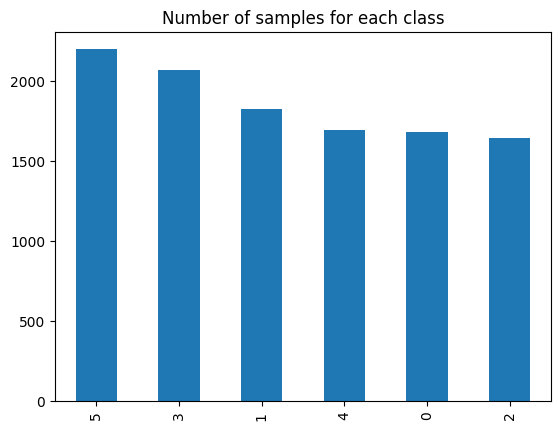

In [ ]:
# Plotting class distribution
data['Category'].value_counts().sort_values(ascending=False).plot(kind='bar', y='Number of Samples',
                                                                title='Number of samples for each class')

In [ ]:
# Best 5 keywords for each class using Title Feaures
from sklearn.feature_selection import chi2
import numpy as np
N = 5
for current_class in list(le.classes_):
    current_class_id = le.transform([current_class])[0]
    features_chi2 = chi2(features_title, labels == current_class_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf_title.get_feature_names_out())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(current_class))
    print("Most correlated unigrams:")
    print('-' *30)
    print('. {}'.format('\n. '.join(unigrams[-N:])))
    print("Most correlated bigrams:")
    print('-' *30)
    print('. {}'.format('\n. '.join(bigrams[-N:])))
    print("\n")

# 'Art&Music':
Most correlated unigrams:
------------------------------
. arts
. official
. paint
. music
. art
Most correlated bigrams:
------------------------------
. music education
. official music
. music video
. music art
. art music


# 'Food':
Most correlated unigrams:
------------------------------
. foods
. try
. world
. street
. food
Most correlated bigrams:
------------------------------
. chinese street
. kid try
. food tour
. food world
. street food


# 'History':
Most correlated unigrams:
------------------------------
. documentary
. italy
. ancient
. religion
. history
Most correlated bigrams:
------------------------------
. history china
. course history
. crash course
. history religion
. indian history


# 'Science&Technology':
Most correlated unigrams:
------------------------------
. scientists
. happen
. brain
. technology
. science
Most correlated bigrams:
------------------------------
. technology society
. current affairs
. food science
. university scienc

In [ ]:
# Best 5 keywords for each class using Description Features
from sklearn.feature_selection import chi2
import numpy as np
N = 5
for current_class in list(le.classes_):
    current_class_id = le.transform([current_class])[0]
    features_chi2 = chi2(features_description, labels == current_class_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf_desc.get_feature_names_out())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(current_class))
    print("Most correlated unigrams:")
    print('-' *30)
    print('. {}'.format('\n. '.join(unigrams[-N:])))
    print("Most correlated bigrams:")
    print('-' *30)
    print('. {}'.format('\n. '.join(bigrams[-N:])))
    print("\n")

# 'Art&Music':
Most correlated unigrams:
------------------------------
. draw
. arts
. music
. paint
. art
Most correlated bigrams:
------------------------------
. fine art
. acrylic paint
. music education
. music art
. art music


# 'Food':
Most correlated unigrams:
------------------------------
. mike
. delicious
. httpinstagrammikexingchen
. street
. food
Most correlated bigrams:
------------------------------
. mike fan
. page httpswwwfacebookcommikeychenx
. facebook mike
. instagram httpinstagrammikexingchen
. street food


# 'History':
Most correlated unigrams:
------------------------------
. empire
. war
. ancient
. religion
. history
Most correlated bigrams:
------------------------------
. computer history
. history channel
. world history
. crash course
. indian history


# 'Science&Technology':
Most correlated unigrams:
------------------------------
. whalewatchmeplz
. dnews
. technology
. science
. seeker
Most correlated bigrams:
------------------------------
. seeke

# **Modeling and Training**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import linear_model
from sklearn.ensemble import AdaBoostClassifier

X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 1:3], data['Category'], random_state = 0)
X_train_title_features = tfidf_title.transform(X_train['Title']).toarray()
X_train_desc_features = tfidf_desc.transform(X_train['Description']).toarray()
features = np.concatenate([X_train_title_features, X_train_desc_features], axis=1)

In [ ]:
X_train.head()

,Title,Description
1065,iyasume musubi gem food waikiki hawaii,iyasume musubi wonderful place eat local hawai...
9557,power art music,collaboration leonard cheshire disability lond...
5211,travel vlog thailand bangkok phuket krabi,partner visa travel thailand share great cultu...
9421,cause charley horse avoid,charley horse worst let take look go body cram...
1425,egg fry rice street food around world hyderaba...,eggrecipes fastfood egg fry rice street food a...


In [ ]:
y_train.head()

1065    1
9557    0
5211    5
9421    3
1425    1
Name: Category, dtype: int64

In [ ]:
# Naive Bayes
nb = MultinomialNB().fit(features, y_train)
# SVM
svm = linear_model.SGDClassifier(loss='modified_huber',max_iter=1000, tol=1e-3).fit(features,y_train)


In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.utils.data_utils import pad_sequences
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.utils.np_utils import to_categorical

# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 20000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 50
# This is fixed.
EMBEDDING_DIM = 100

# Combining titles and descriptions into a single sentence
titles = data['Title'].values
descriptions = data['Description'].values
data_for_lstms = []
for i in range(len(titles)):
    temp_list = [titles[i], descriptions[i]]
    data_for_lstms.append(' '.join(temp_list))

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(data_for_lstms)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

# Convert the data to padded sequences
X = tokenizer.texts_to_sequences(data_for_lstms)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

# One-hot Encode labels
Y = pd.get_dummies(data['Category']).values
print('Shape of label tensor:', Y.shape)

# Splitting into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state = 42)

Found 104234 unique tokens.
Shape of data tensor: (11128, 50)
Shape of label tensor: (11128, 6)


In [ ]:
# Define LSTM Model
from keras.models import Sequential
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(6, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 100)           2000000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 50, 100)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 6)                 606       
                                                                 
Total params: 2,081,006
Trainable params: 2,081,006
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# Training LSTM Model
epochs = 5
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1)

Epoch 1/5
118/118 [==============================] - 34s 248ms/step - loss: 1.1630 - accuracy: 0.5621 - val_loss: 0.5801 - val_accuracy: 0.8263
Epoch 2/5
118/118 [==============================] - 25s 213ms/step - loss: 0.3600 - accuracy: 0.9039 - val_loss: 0.3537 - val_accuracy: 0.8946
Epoch 3/5
118/118 [==============================] - 25s 215ms/step - loss: 0.1763 - accuracy: 0.9561 - val_loss: 0.3579 - val_accuracy: 0.8994
Epoch 4/5
118/118 [==============================] - 27s 226ms/step - loss: 0.1154 - accuracy: 0.9700 - val_loss: 0.3483 - val_accuracy: 0.9066
Epoch 5/5
118/118 [==============================] - 28s 234ms/step - loss: 0.0964 - accuracy: 0.9750 - val_loss: 0.4193 - val_accuracy: 0.8994


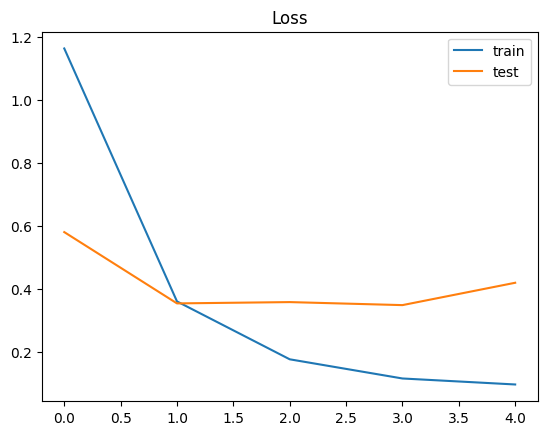

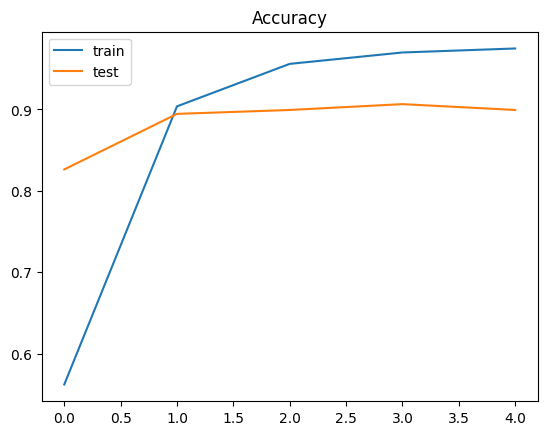

In [ ]:
import matplotlib.pyplot as plt
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

# **Performance Evaluation**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 1:3], data['Category'], random_state = 0)
X_test_title_features = tfidf_title.transform(X_test['Title']).toarray()
X_test_desc_features = tfidf_desc.transform(X_test['Description']).toarray()
test_features = np.concatenate([X_test_title_features, X_test_desc_features], axis=1)

In [ ]:
pip install scikit-plot

## Naive Bayes

                    precision    recall  f1-score   support

         Art&Music       0.98      0.97      0.97       421
              Food       0.96      0.93      0.95       435
           History       0.94      0.96      0.95       405
Science&Technology       0.96      0.99      0.97       549
     manufacturing       0.99      0.96      0.97       423
       travel blog       0.96      0.97      0.96       549

          accuracy                           0.96      2782
         macro avg       0.97      0.96      0.96      2782
      weighted avg       0.97      0.96      0.96      2782



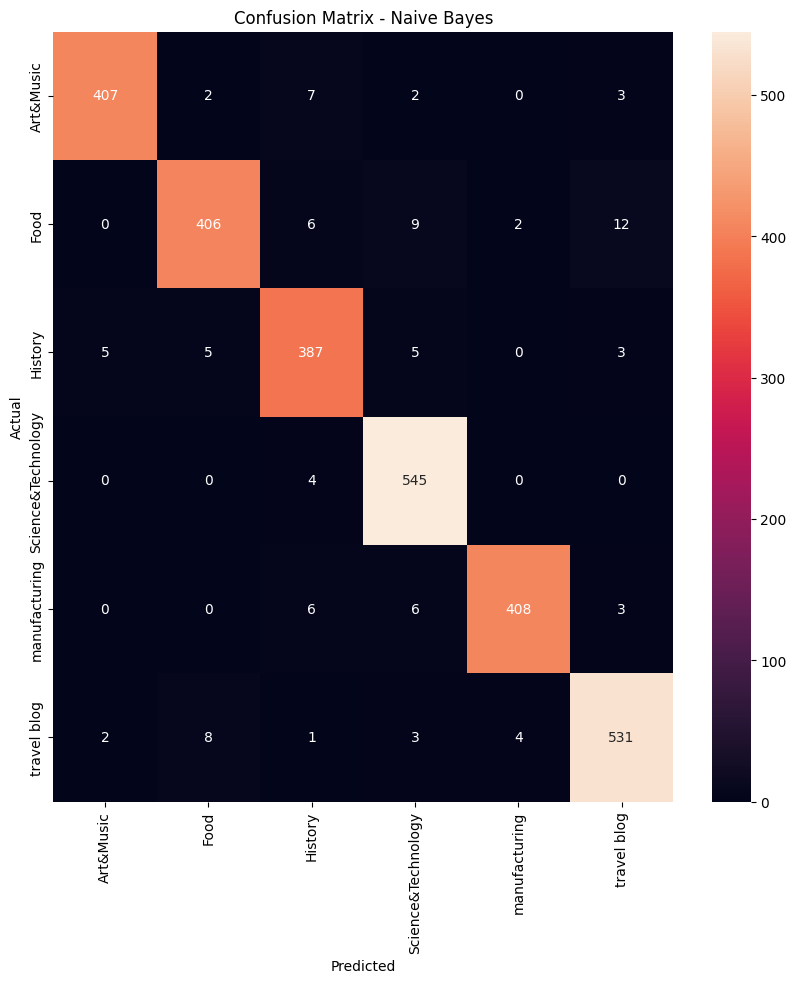

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


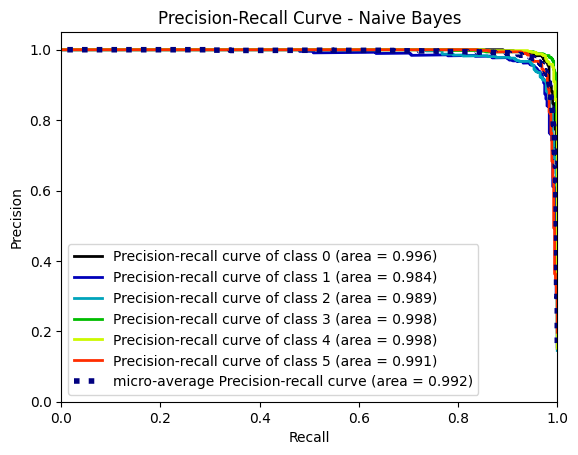

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import scikitplot as skplt

X_test_title_features = tfidf_title.transform(X_test['Title']).toarray()
X_test_desc_features = tfidf_desc.transform(X_test['Description']).toarray()
test_features = np.concatenate([X_test_title_features, X_test_desc_features], axis=1)

# Naive Bayes
y_pred = nb.predict(test_features)
y_probas = nb.predict_proba(test_features)

print(metrics.classification_report(y_test, y_pred,
                                    target_names=list(le.classes_)))

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=list(le.classes_), yticklabels=list(le.classes_))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

skplt.metrics.plot_precision_recall_curve(y_test, y_probas)
plt.title('Precision-Recall Curve - Naive Bayes')
plt.show()

## SVM

                    precision    recall  f1-score   support

         Art&Music       0.98      1.00      0.99       421
              Food       0.97      0.98      0.97       435
           History       0.99      0.99      0.99       405
Science&Technology       0.99      0.99      0.99       549
     manufacturing       0.99      0.99      0.99       423
       travel blog       0.98      0.96      0.97       549

          accuracy                           0.98      2782
         macro avg       0.98      0.98      0.98      2782
      weighted avg       0.98      0.98      0.98      2782



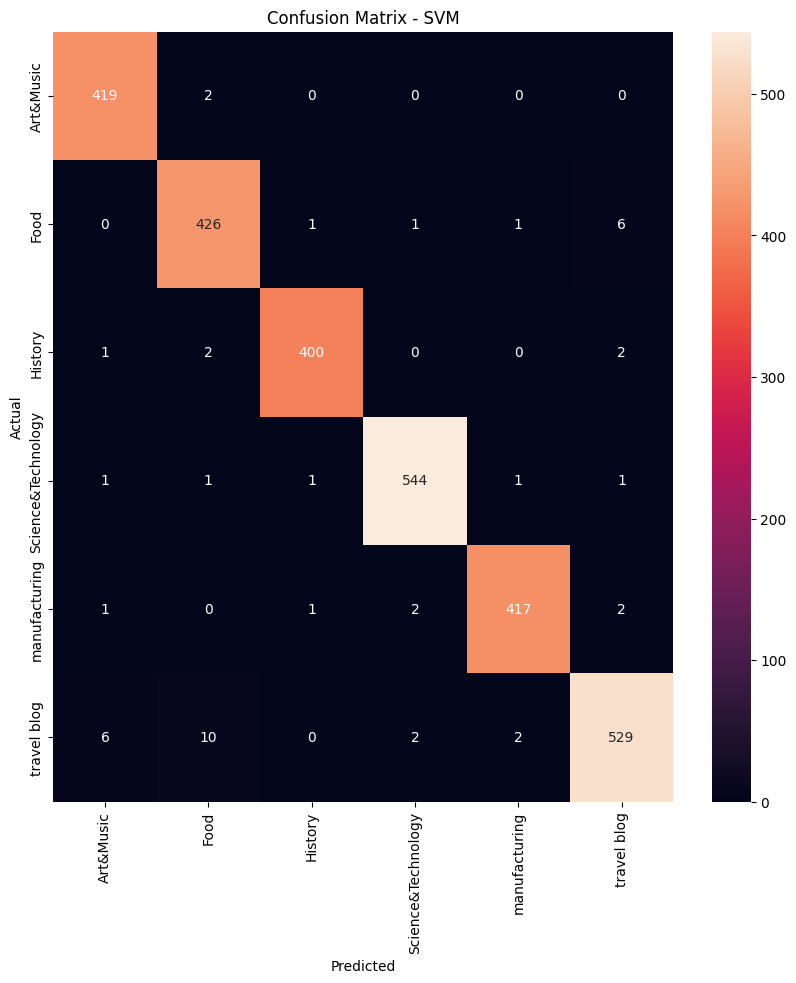

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


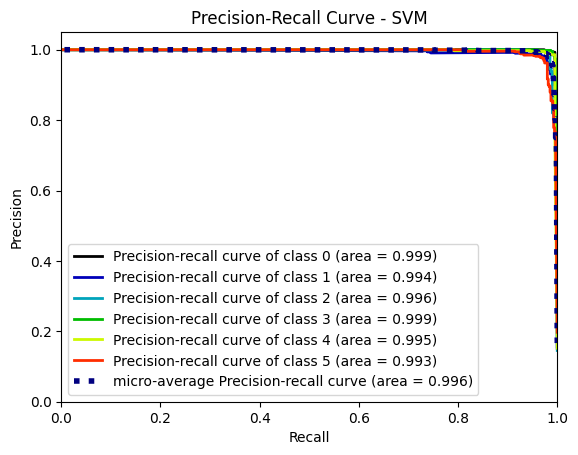

In [ ]:
# SVM
y_pred = svm.predict(test_features)
y_probas = svm.predict_proba(test_features)

print(metrics.classification_report(y_test, y_pred,
                                    target_names=list(le.classes_)))

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=list(le.classes_), yticklabels=list(le.classes_))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - SVM')
plt.show()

skplt.metrics.plot_precision_recall_curve(y_test, y_probas)
plt.title('Precision-Recall Curve - SVM')
plt.show()

## LSTM

87/87 [==============================] - 3s 29ms/step
                    precision    recall  f1-score   support

         Art&Music       0.87      0.87      0.87       413
              Food       0.90      0.90      0.90       470
           History       0.89      0.87      0.88       415
Science&Technology       0.88      0.93      0.91       515
     manufacturing       0.84      0.95      0.89       421
       travel blog       0.97      0.82      0.89       548

          accuracy                           0.89      2782
         macro avg       0.89      0.89      0.89      2782
      weighted avg       0.89      0.89      0.89      2782



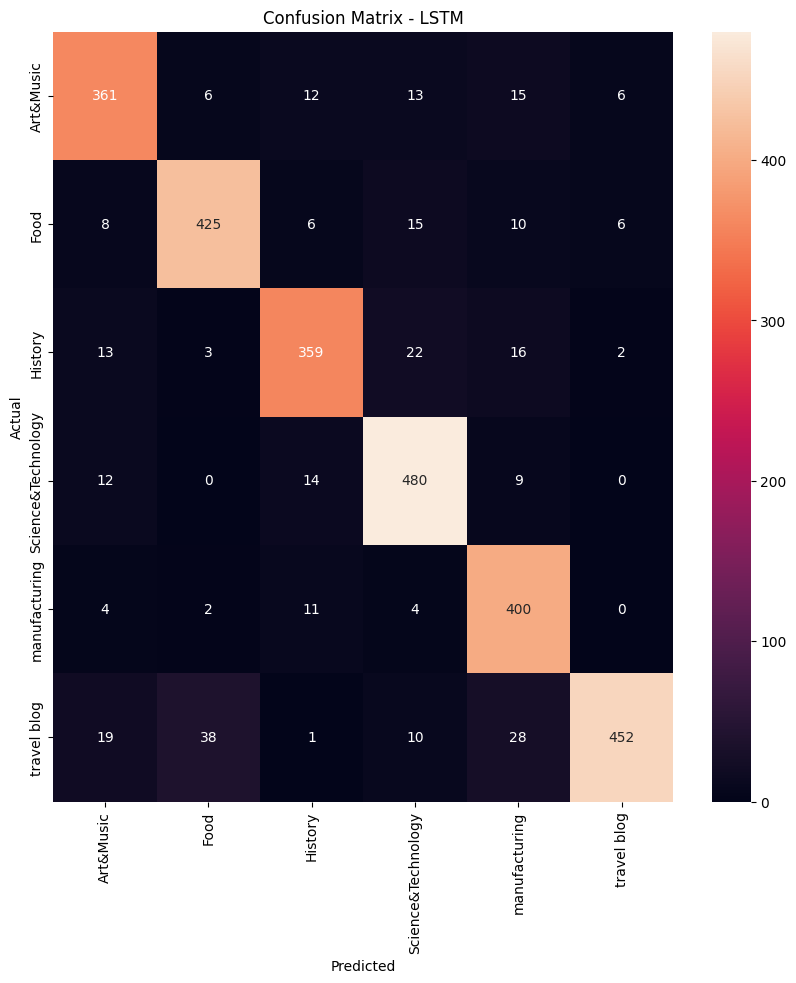

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


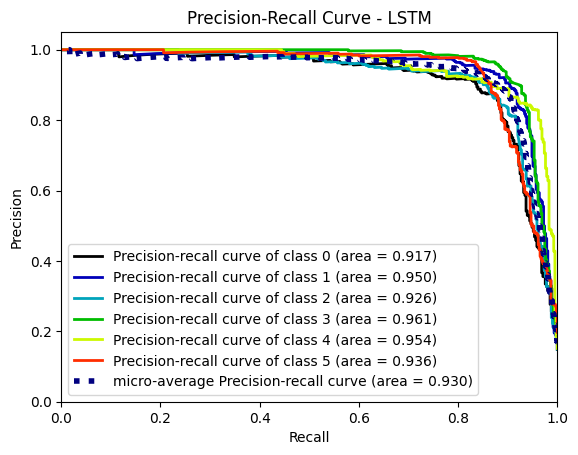

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state = 42)
y_probas = model.predict(X_test)
y_pred = np.argmax(y_probas, axis=1)
y_test = np.argmax(Y_test, axis=1)

print(metrics.classification_report(y_test, y_pred,
                                    target_names=list(le.classes_)))

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=list(le.classes_), yticklabels=list(le.classes_))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - LSTM')
plt.show()

skplt.metrics.plot_precision_recall_curve(y_test, y_probas)
plt.title('Precision-Recall Curve - LSTM')
plt.show()